# Exploratory Data Analysis Part Two - Review Text Attributes

This notebook contains exploratory data analysis of the review text attributes with respect to ratings:

* Section 1 - import libraries and load data
* Section 2 - 

basic data cleaning
* Section 2 - number of words in a review
* Section 3 - average word length
* Section 4 - capitalization
* Section 5 - punctuation 
* Section 6 - emojis
* Section 7 - heatmap
* Section 8 - positive and negative reviews review titles and text
* Section 9 - positive and negative word clouds
* Sections 10 - most frequent positive and negative words by category

Datasets needed to run notebook:

* models1.csv

Data saved to:

* Text_attributes.csv


# Section 1: Import libraries and load data

In [10]:
#!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats
import researchpy as rp
import re
import pickle
from collections import Counter
#import emot
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
#import emoji
import matplotlib.pyplot as plt
#import plotly.express as px
import nltk
nltk.download('punkt')
import gensim
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imoge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Bring in dataset from Exploratory Data Analysis Notebook Part 1
reviews = pd.read_csv("models1.csv",index_col = 0)

# Section 1: Examine the data and preprocessing

In [10]:
# Examine shape
reviews.shape

(10325, 11)

In [11]:
# Examine sample from df
reviews.sample(1)

,Name,Category,Town,Type,Contributions,Title,Review,Rating,Date,LocCode,Cuisine
10052,Arundel Castle,Attractions,Arundel,Historical/Culture,45,A good place to visit,"A stunning hill top castle in great condition,...",5,3.0,2.0,0


In [12]:
# Check datatypes
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10325 entries, 0 to 10324
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           10325 non-null  object 
 1   Category       10325 non-null  object 
 2   Town           10325 non-null  object 
 3   Type           10325 non-null  object 
 4   Contributions  10325 non-null  int64  
 5   Title          10325 non-null  object 
 6   Review         10325 non-null  object 
 7   Rating         10325 non-null  int64  
 8   Date           10325 non-null  float64
 9   LocCode        10325 non-null  float64
 10  Cuisine        10325 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 968.0+ KB


In [13]:
# Create new dataframe with just the review related data
reviews = reviews[["Category","Name","Title","Review","Rating","Town"]]

In [14]:
# Combine the title and review text column into one column - as data in title often useful
reviews['all_text'] = reviews['Title'] + ' ' + reviews['Review']
reviews.head(2)

,Category,Name,Title,Review,Rating,Town,all_text
0,Accommodation,Norfolk Arms,Great value in the heart of arundel,Booked a room to stay the night in Arundel. Th...,4,Arundel,Great value in the heart of arundel Booked a r...
1,Accommodation,Town House,"Excellent food,service and ambience!",We’ve eaten here with a group of friends who g...,5,Arundel,"Excellent food,service and ambience! We’ve eat..."


# Section 2: Number of Words Per Review

Does the number of words per review vary by rating?

## All Categories

In [15]:
# Maximum,minimum and mean length of string
print(reviews.all_text.str.len().max())
print(reviews.all_text.str.len().min())
print(reviews.all_text.str.len().mean())

11422
104
493.0845520581114


In [16]:
# Find number of words per review 
reviews["num_words"] = reviews['all_text'].str.split().apply(len)
reviews.head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_words
0,Accommodation,Norfolk Arms,Great value in the heart of arundel,Booked a room to stay the night in Arundel. Th...,4,Arundel,Great value in the heart of arundel Booked a r...,48
1,Accommodation,Town House,"Excellent food,service and ambience!",We’ve eaten here with a group of friends who g...,5,Arundel,"Excellent food,service and ambience! We’ve eat...",169


In [17]:
# Examine one review
reviews.all_text.loc[21]

'I had to stay near Arundel for business. Hanger Down House Bed and Breakfast was just what I needed, in a lovely quiet location. Alison gave me a friendly welcome and showed me to my bright and airy room, helpfully recommended and directed me to a local restaurant, then left me to unpack my belongings. The room was stylishly furnished with an enormous comfortable bed, and the en-suite bathroom had a shower, and heated towel rail which was very welcome! The next morning it was lovely to open my curtains to the view over the garden. Breakfast was absolutely yummy. Lots of choice - cereals & mueslis, yogurts, fresh fruit and a hot roll, then sausages, bacon, egg, tomato, mushrooms and baked beans for the traditional full English, as well as toast & superb homemade marmalade and Lovely location, room and breakfast'

In [18]:
# Check the number of words
reviews.num_words.loc[21]

142

In [19]:
# Look at stats for the number of words column
reviews["num_words"].describe()

count    10325.000000
mean        90.055981
std         91.600296
min         13.000000
25%         41.000000
50%         64.000000
75%        106.000000
max       2193.000000
Name: num_words, dtype: float64

In [20]:
# Median number of words per review
reviews["num_words"].median()

64.0

In [21]:
# visualize the distribution of number of words in a text - interactive chart
#fig = px.histogram(reviews, x = "num_words", nbins = 100,title="Distribution of Number of Words In Documents")
#fig.show()

In [22]:
# Plot the top accommodation establishments by number of reviews
def plot_est(category,title):
    fig, ax = plt.subplots()
    ax.hist(category.values,bins = 10, color = "xkcd:faded blue", alpha = 0.8)
    ax.set_title(title)
    ax.set_xlabel("Number of Words", fontsize = 10, labelpad = 10)
    ax.set_ylabel("Number of Reviews", fontsize = 10, labelpad = 10)
    ax.set_facecolor("white")
    plt.show()

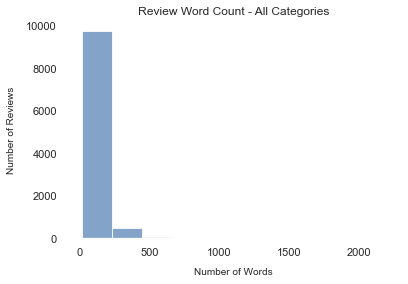

In [23]:
# Look at distribution of words per review (static chart)
plot_est(reviews["num_words"],"Review Word Count - All Categories")

In [24]:
# Skew of data
reviews.num_words.skew()

5.774230823996006

In [25]:
# Which establishments have reviews greater than 1000 words
reviews[reviews["num_words"]>1000]["Name"]

351            Butlins
857            Butlins
972            Butlins
1545    Bailiffs Court
1843           Butlins
2025           Butlins
2116           Butlins
2331           Butlins
Name: Name, dtype: object

In [26]:
# Ratings for those establishments with the longest reviews over 1000 characters
reviews[reviews["num_words"]>1000]["Rating"].value_counts()

4    3
5    2
1    1
2    1
3    1
Name: Rating, dtype: int64

In [27]:
# Ratings for those reviews with less than 200 words 
reviews[reviews["num_words"]<=200]["Rating"].value_counts()

5    5973
4    1779
3     739
1     616
2     444
Name: Rating, dtype: int64

Appears that longer reviews are rated lower than those that are shorter

In [28]:
# Median length of reviews by rating
num_words_by_rating_median = round(reviews.groupby("Rating")["num_words"].median())
num_words_by_rating_median

Rating
1     96
2    109
3     86
4     65
5     56
Name: num_words, dtype: int64

In [29]:
# Most common length of review
reviews["num_words"].mode()

0    41
dtype: int64

In [30]:
# Mean number of words by rating
num_words_by_rating = round(reviews.groupby("Rating")["num_words"].mean())
num_words_by_rating

Rating
1    134.0
2    141.0
3    121.0
4     94.0
5     75.0
Name: num_words, dtype: float64

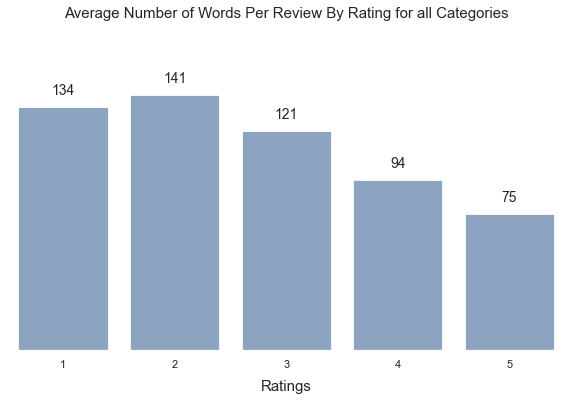

In [31]:
# Plot chart
a = num_words_by_rating.index
b = num_words_by_rating.values
b = b.astype(int)

plt.figure(figsize=(10,6))
ax= sns.barplot(a, b, color = "xkcd:faded blue", alpha = 0.8)
ax.set_facecolor("white")
ax.set_title("Average Number of Words Per Review By Rating for all Categories", fontsize = 15)
ax.set_xlabel('Ratings', fontsize = 15, labelpad = 10)
ax.set_yticklabels([])
ax.set_ylim(0,180)
rects = ax.patches
labels = b
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom',fontsize = 14)
plt.show();

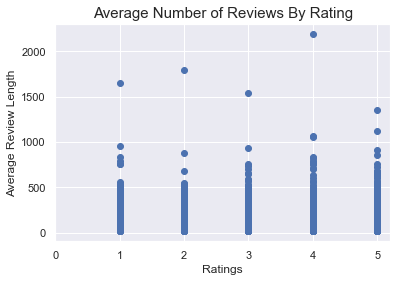

In [32]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.num_words)
plt.title("Average Number of Reviews By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Average Review Length")

In [33]:
# Boxplot excluding outliers
def box(x,y,title,ylabel):
    ax = sns.boxplot(x = x, y = y,showfliers = False, 
                     palette = ["lightsteelblue"])
    ax.set_facecolor("white")
    ax.set_ylabel(ylabel, fontsize = 12, labelpad = 10)
    ax.set_xlabel("Rating",fontsize = 12, labelpad = 10)
    ax = plt.title(title, fontsize = 13)
    plt.show()

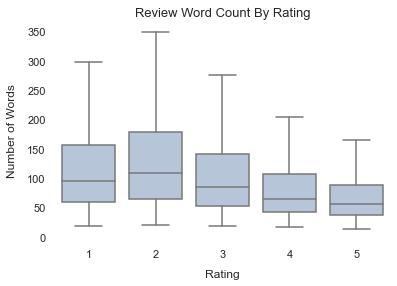

In [34]:
box(reviews["Rating"], reviews["num_words"],"Review Word Count By Rating","Number of Words")

Negative reviews appear to be longer than positive reviews based on average number or words per review

In [35]:
def stats_func(x,y):
    print("Shapiro Normality Test:",stats.shapiro(x))
    print("Levene Variance Test:",stats.levene(x[y == 1], x[y == 2], x[y == 3],x[y == 4],x[y == 5]))
    print("F-Test ANOVA:",stats.f_oneway(x[y == 1],x[y == 2], x[y == 3],x[y == 4],x[y == 5]))

In [36]:
stats_func(reviews["num_words"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.5800912380218506, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=40.65090022541675, pvalue=1.430170125397708e-33)
F-Test ANOVA: F_onewayResult(statistic=76.01228115699772, pvalue=1.168588749685715e-62)


* H0 - population means the same, no relationship
* H1 - the population means are different so there is a relationship between the length of review and the rating
* Data is not normally distributed and does not have constant variance but the sample size is large so with p < 0.05, we can reject the null hypothesis of the F-test of population means being the same.

## By Category

Is there a difference in the mean review length by rating for accommodation, food and attractions?

### Accommodation

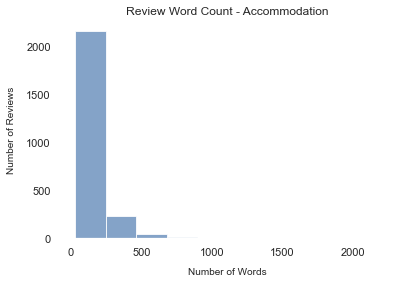

In [37]:
# Number of words per review for accommodation
hotel_num_words = reviews[reviews["Category"] == "Accommodation"]["num_words"]
plot_est(hotel_num_words,"Review Word Count - Accommodation")

In [38]:
# Basic statistics on number of words for hotel reviews
hotel_num_words.describe()

count    2462.000000
mean      133.032494
std       144.332959
min        32.000000
25%        53.000000
50%        85.000000
75%       153.000000
max      2193.000000
Name: num_words, dtype: float64

In [39]:
# Average number of words by rating
hotel_average_review = round(reviews[reviews["Category"] == "Accommodation"].groupby("Rating")["num_words"].mean())
hotel_average_review

Rating
1    186.0
2    175.0
3    176.0
4    145.0
5    107.0
Name: num_words, dtype: float64

* Most hotel reviews are under 200 words but there are a number of very long reviews.
* The lowest rated reviews appear to be longer on average than the highest rated

### Food

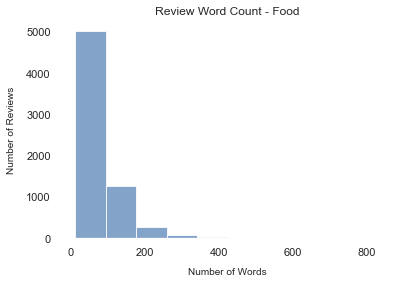

In [40]:
# Number of words per review for food reviews
food_num_words = reviews[reviews["Category"] == "Food"]["num_words"]
plot_est(food_num_words,"Review Word Count - Food")

In [41]:
# Basic statistics for number of words for restaurant reviews
food_num_words.describe()

count    6671.000000
mean       75.909009
std        60.718064
min        13.000000
25%        36.000000
50%        58.000000
75%        95.000000
max       834.000000
Name: num_words, dtype: float64

In [42]:
# Average number of words by rating
food_average_review = round(reviews[reviews["Category"] == "Food"].groupby("Rating")["num_words"].mean())
food_average_review

Rating
1    117.0
2    127.0
3     95.0
4     72.0
5     64.0
Name: num_words, dtype: float64

* Most restaurant reviews are under 100 words with again some longer reviews as outliers
* The lowest rated reviews are longer on average than the highest rated

### Attractions

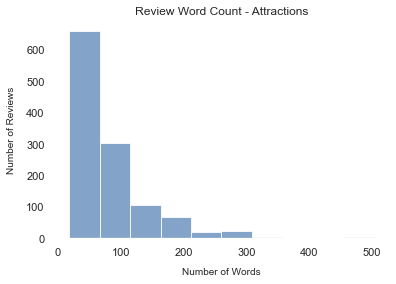

In [43]:
# Number of words per review for attractions
attract_num_words = reviews[reviews["Category"] == "Attractions"]["num_words"]
plot_est(attract_num_words,"Review Word Count - Attractions")

In [44]:
# Basic statistics for number of words for attraction reviews
attract_num_words.describe()

count    1192.000000
mean       80.463926
std        63.317947
min        18.000000
25%        39.000000
50%        61.000000
75%        99.000000
max       503.000000
Name: num_words, dtype: float64

In [45]:
# Average number of words by rating
attract_average_review = round(reviews[reviews["Category"] == "Attractions"].groupby("Rating")["num_words"].mean())
attract_average_review

Rating
1    113.0
2    150.0
3    103.0
4     80.0
5     75.0
Name: num_words, dtype: float64

* Most attraction reviews are under 50 words but there are some outliers, although the distribution is less skewed
* The lowest rated reviews are longer on average than the highest rated

In [46]:
# Create dataframe of the average review length by category
review_len = pd.concat([hotel_average_review,food_average_review,attract_average_review], axis = 1, ignore_index = True)
review_len.columns = ["Hotels","Attractions","Restaurants"]
review_len
#rest2.fillna(0)

,Hotels,Attractions,Restaurants
Rating,,,
1,186.0,117.0,113.0
2,175.0,127.0,150.0
3,176.0,95.0,103.0
4,145.0,72.0,80.0
5,107.0,64.0,75.0


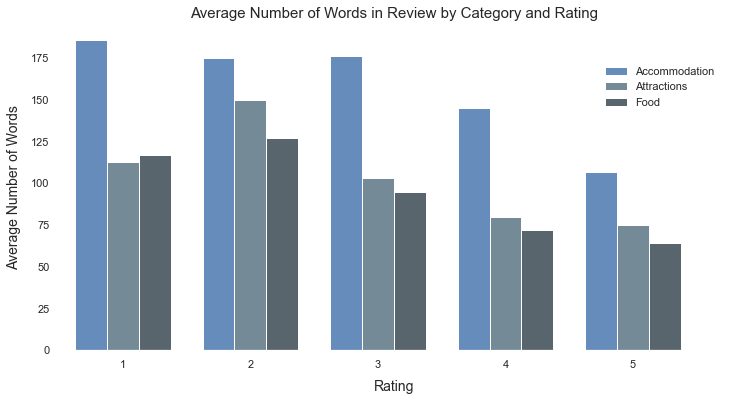

In [47]:
pos =list(range(len(review_len.iloc[:,0])))
width = 0.25 
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor("white")
ax.bar(pos,review_len["Hotels"] , width,label=review_len.index[0], color = "xkcd:faded blue") 
ax.bar([p + width for p in pos],review_len["Restaurants"] ,width,label= review_len.index[1], color = "xkcd:bluish grey") 
ax.bar([p + width*2 for p in pos],review_len["Attractions"],width,label=review_len.index[2], color = "xkcd:slate grey") 
ax.set_title("Average Number of Words in Review by Category and Rating", fontsize = 15)
#ax.set_ylim(ylim)
ax.grid(axis = 'y', color = "grey", linestyle = ":", alpha = 0.8)
ax.set_ylabel("Average Number of Words", fontsize = 14,labelpad = 10)
ax.set_xlabel("Rating",fontsize = 14, labelpad = 10)
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(review_len.index)
ax.set_xlim(min(pos)-width, max(pos)+width*4)
ax.legend(['Accommodation','Attractions','Food'],loc='upper left', frameon = False, bbox_to_anchor = (0.8,0.9))
plt.show()

* Hotel reviews are longer for lower rated reviews than higher
* This is also the case for food and attractions reviews with the exception of the lowest one-star rating. 

# Section 3: Word Length

Does the number of characters per word vary by rating? Do people use longer or shorter words when writing bad reviews?

In [48]:
# Find number of chars per review excluding spaces
reviews["num_chars"] = reviews['all_text'].apply(lambda x: len(x) - x.count(" "))
reviews.head(1)

,Category,Name,Title,Review,Rating,Town,all_text,num_words,num_chars
0,Accommodation,Norfolk Arms,Great value in the heart of arundel,Booked a room to stay the night in Arundel. Th...,4,Arundel,Great value in the heart of arundel Booked a r...,48,202


In [49]:
# Get mean word length and sort by descending
reviews["av_word_len"] = reviews["num_chars"]/reviews["num_words"]

In [50]:
reviews.head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_words,num_chars,av_word_len
0,Accommodation,Norfolk Arms,Great value in the heart of arundel,Booked a room to stay the night in Arundel. Th...,4,Arundel,Great value in the heart of arundel Booked a r...,48,202,4.208333
1,Accommodation,Town House,"Excellent food,service and ambience!",We’ve eaten here with a group of friends who g...,5,Arundel,"Excellent food,service and ambience! We’ve eat...",169,781,4.621302


In [51]:
# Group average characters by rating
reviews.groupby("Rating")["av_word_len"].mean()

Rating
1    4.455776
2    4.459211
3    4.456385
4    4.555238
5    4.667850
Name: av_word_len, dtype: float64

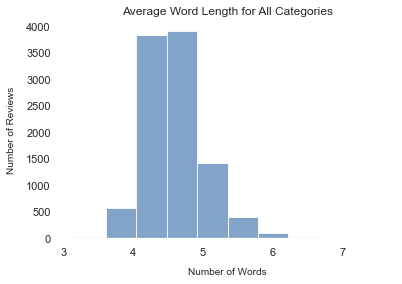

In [52]:
# Distribution of word average word length
plot_est(reviews.av_word_len,"Average Word Length for All Categories")

In [53]:
# Skew of data
reviews.av_word_len.skew()

0.9771356846238326

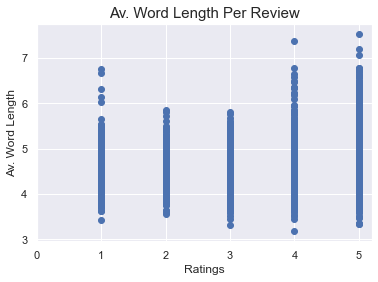

In [54]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.av_word_len)
plt.title("Av. Word Length Per Review", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Av. Word Length")

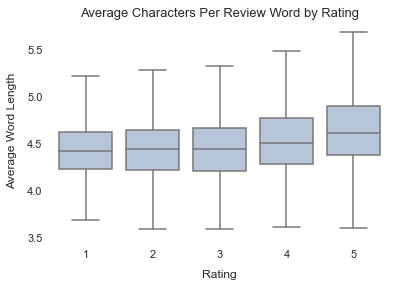

In [55]:
box(reviews["Rating"], reviews["av_word_len"],"Average Characters Per Review Word by Rating","Average Word Length")

In [56]:
stats_func(reviews["av_word_len"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.9502202868461609, pvalue=3.4118215253637915e-38)
Levene Variance Test: LeveneResult(statistic=12.111979756441336, pvalue=8.475353709697463e-10)
F-Test ANOVA: F_onewayResult(statistic=60.61168164077059, pvalue=4.551181336808441e-50)


* Data is slightly positively skewed, with non constant variance but large sample size so F-test accepted
* Reject null hypothesis of having the same population mean at 5% significance, there does appear to be a relationship between the average word length of a review and the rating given with longer words being used for higher rated reviews,which is interesting.

# Section 4: Capitalization

Does the amount of capitalisation used vary with the rating given? Are unhappy or happy people likely to use more capitalisation?

In [57]:
# Find number of upper case characters - ie do people 'shout' if not happy?
reviews['uppercase'] = reviews["all_text"].apply(lambda x: sum(char.isupper() for char in x))
reviews["prop_uc"] = reviews["uppercase"]/reviews["num_chars"]

In [58]:
# Sort by highest value for prop_uc
reviews.sort_values(by = "prop_uc",ascending = False).head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_words,num_chars,av_word_len,uppercase,prop_uc
1949,Accommodation,Avisford,OVERNIGHT STAY,What a treat we thought we were in for ...... ...,2,Arundel,OVERNIGHT STAY What a treat we thought we were...,227,910,4.008811,368,0.404396
946,Accommodation,Butlins,Family disaster.,PLEASE READ THIS EVERYONE. I visited here last...,1,Bognor,Family disaster. PLEASE READ THIS EVERYONE. I ...,53,235,4.433962,80,0.340426


In [59]:
# Look at one example - with negative rating
print(reviews["all_text"].iloc[290])

Excellent location and value Stayed here with family it was a great location. Ten minute walk to Arundel Town Centre and the castle. Bedrooms comfortable and clean. Restaurant next door good as well although book your table in the evening if it is a weekend.
Read less


In [60]:
# Example with positive rating
print(reviews["all_text"].iloc[6182])

Visited the Inglenook hotel Visited the Inglenook hotel today for Christmas lunch. It was fantastic from start to finish. The place was decorated for Christmas with excellent style, the tables were set with sparkles and high quality Christmas crackers. The service was brilliant and the food was cooked to perfection. Well done to all involved


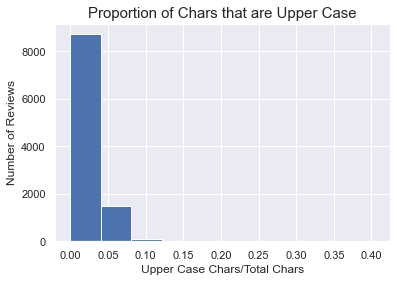

In [61]:
# Plot histogram of frequency of review size by number of words
plt.hist(reviews.prop_uc,bins = 10)
plt.xlabel("Upper Case Chars/Total Chars")
plt.ylabel("Number of Reviews")
ax = plt.title("Proportion of Chars that are Upper Case", fontsize = 15)

In [62]:
reviews.prop_uc.skew()

5.460535385935044

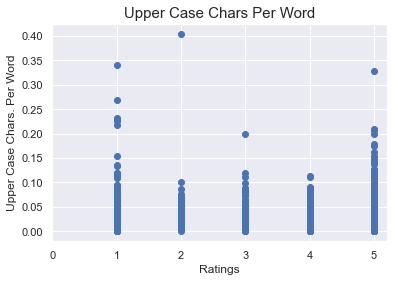

In [63]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.prop_uc)
plt.title("Upper Case Chars Per Word", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Upper Case Chars. Per Word")

In [64]:
# Stats for the proportion of upper case
reviews['prop_uc'].describe()

count    10325.000000
mean         0.029709
std          0.016126
min          0.000000
25%          0.020772
50%          0.026946
75%          0.035242
max          0.404396
Name: prop_uc, dtype: float64

In [65]:
# Average number of words by rating
uc_by_rating = reviews.groupby("Rating")["prop_uc"].mean()
uc_by_rating

Rating
1    0.029270
2    0.025232
3    0.025826
4    0.028095
5    0.031209
Name: prop_uc, dtype: float64

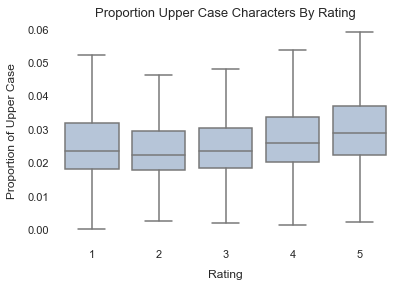

In [66]:
# Boxplot of the data
box(reviews["Rating"],reviews["prop_uc"],"Proportion Upper Case Characters By Rating","Proportion of Upper Case")

In [67]:
stats_func(reviews["prop_uc"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.6420660018920898, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=11.680023127636481, pvalue=1.926738854817743e-09)
F-Test ANOVA: F_onewayResult(statistic=18.66759023562952, pvalue=3.0400660211706377e-15)


* Data is heavily positively skewed, non-constant variance but large sample size.
* F-test ANOVA significant at 5% so reject null hypothesis that two or more groups have the same mean, suggests there is some relationship between the amount of capitalized letters used and the rating given to a review 
* The slight bow shape indicates capitalisation is used more for the most positive and negative reviews perhaps reflecting stronger sentimen.

# Section 5: Punctuation

Does the amount of punctuation vary with rating given? Do happy or unhappy people use more or less punctuation?

In [68]:
# Find amount of punctuation and express as a proportion of all characters in a string
# includes [!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~]
import string
reviews['special_chars'] = reviews["all_text"].apply(lambda x: sum(char in string.punctuation for char in x))
reviews["prop_sc"] = reviews["special_chars"]/reviews["num_chars"]

In [69]:
# Sort by highest value for prop_uc
reviews.sort_values(by = 'prop_sc',ascending = False).head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_words,num_chars,av_word_len,uppercase,prop_uc,special_chars,prop_sc
8079,Food,The Beresford,A good place to visit,Excellent carvery ................... apart fr...,4,Bognor,A good place to visit Excellent carvery .........,26,134,5.153846,3,0.022388,24,0.179104
4035,Food,Partners Café,Paddy,"Amazing breakfasts & service. Local favorite,a...",5,Arundel,Paddy Amazing breakfasts & service. Local favo...,13,98,7.538462,3,0.030612,16,0.163265


In [70]:
# Example review - positive
print(reviews["all_text"].iloc[5094])

Anniversary dinner We were pleasantly surprised; the food was very good! Service excellent and they picked up on the fact it was our Anniversary and surprised us with the desert below! A lovely dinner


In [71]:
# Example review - positive
print(reviews["all_text"].iloc[10229])

Christmas showing Thoroughly enjoyed the museum and finished with a yummy mince pie and cup of tea. It is sadly closed now till next year
Read less


In [72]:
# Example review - negative
print(reviews["all_text"].iloc[3117])

The worst sandwich I have ever eaten! I visited The Black Rabbit last Monday, (not even a busy day)!
I ordered 2 BLT Sandwiches and 2 cups of tea, payment was taken upfront at the bar at time of order.
50 minutes later, no sign of the teas or sandwiches. I decided to check at the bar, and was told it was on its way.
Another significant amount of time passed, when finally the order arrived by which time were feeling very deflated. I could hardly find a single piece of bacon in the sandwich, the bread was dry and the salad limp, both BLTs the same. You would expect after waiting for more than an hour for a sandwich that something magnificent would arrive.
I can honestly say it was the worst sandwich I have ever eaten, and I have eaten all over the world.
It is a great shame that the service and food here is so poor as the location has so much potential.
Don't waste your time, the whole experience was terrible and I will not be returning.


In [73]:
# Statistical summary
reviews['prop_sc'].describe()

count    10325.000000
mean         0.027310
std          0.012757
min          0.000000
25%          0.019432
50%          0.025907
75%          0.033333
max          0.179104
Name: prop_sc, dtype: float64

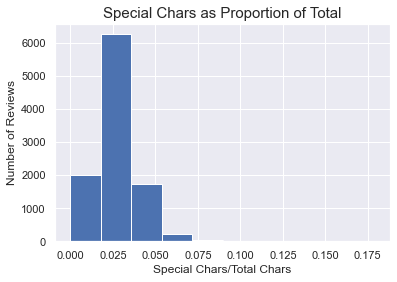

In [74]:
# Plot histogram of frequency of review size by number of words
plt.hist(reviews.prop_sc,bins = 10)
plt.xlabel("Special Chars/Total Chars")
plt.ylabel("Number of Reviews")
ax = plt.title("Special Chars as Proportion of Total", fontsize = 15)

In [75]:
reviews.prop_sc.skew()

1.4947868122380548

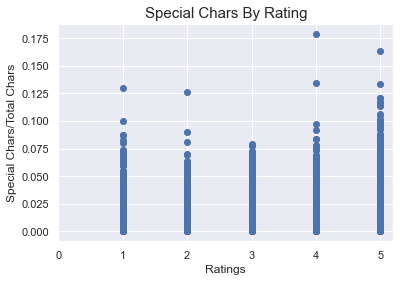

In [76]:
# Plot user contributions against rating value
plt.scatter(reviews.Rating,reviews.prop_sc)
plt.title("Special Chars By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Special Chars/Total Chars")

In [77]:
# Average number of words by rating
num_punct_by_rating = reviews.groupby("Rating")["prop_sc"].mean()
num_punct_by_rating

Rating
1    0.028261
2    0.026451
3    0.026096
4    0.026740
5    0.027620
Name: prop_sc, dtype: float64

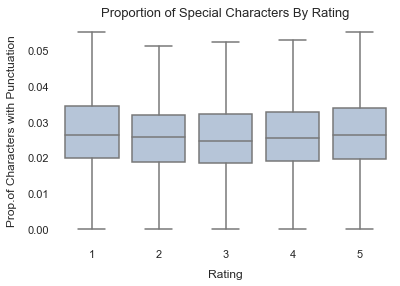

In [78]:
box(reviews["Rating"],reviews["prop_sc"],"Proportion of Special Characters By Rating","Prop.of Characters with Punctuation")

In [79]:
stats_func(reviews["prop_sc"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.933046817779541, pvalue=1.071993325208485e-42)
Levene Variance Test: LeveneResult(statistic=3.3948385884932426, pvalue=0.008826207366514563)
F-Test ANOVA: F_onewayResult(statistic=2.6997015356422986, pvalue=0.02903680196591206)


* Data is postively skewed, with constant variance
* F-test ANOVA significant at 5% so reject null hypothesis that two or more groups have the same mean, suggests there is some relationship between the amount of punctuation
* The slight bow shape indicates punctuation is used more for the most positive and negative reviews, again perhaps reflecting strength of emotion.

# Section 6: Emojis and Emoticons

Sentiment is increasingly contained in emojis and emoticons.

* Does the number of emojis used per review vary with rating?


In [80]:
# Uncomment and run to get list of emoji icons
# emoji.EMOJI_ALIAS_UNICODE

In [81]:
# Sample text
test_post = reviews["all_text"].iloc[4]
test_post

'Clean and Friendly  Stayed for one night, in room 14 which was clean and cosy.\nLots of free parking, the only downside was patchy wi fi and no phone signal in the room.\nThe buffet breakfast was very good and the staff nice and friendly.\nRead less'

In [82]:
# Function to find emojis in text
def find_emojies(text):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
    emoji = re.findall(EMOJI_PATTERN, text)
    return emoji

In [83]:
# Function to find emoticons
#def find_emoticons (text):
   # return emot.emoticons(text)

In [84]:
# Apply to dataframe
reviews["Emoji"] = reviews["all_text"].apply(find_emojies)

In [85]:
# Fill zeros for nan entries where there are no emojis
reviews["Emoji"]= reviews["Emoji"].apply(lambda x: np.nan if len(x)==0 else x)
reviews["Emoji"] = reviews["Emoji"].fillna(0)

In [86]:
# Count emojis
reviews["Emoji_count"] = reviews["Emoji"].apply(lambda x:len(x) if isinstance(x,list) else 0)                                                               

In [87]:
# Number of emojis used
reviews["Emoji_count"].value_counts()

0    10197
1       98
2       19
3        8
4        2
5        1
Name: Emoji_count, dtype: int64

In [88]:
# Proportion of emojis of words used in a review
reviews["Emoji_prop"] = reviews["Emoji_count"]/reviews["num_words"]

In [89]:
# Sort to see if there are outliers
reviews["Emoji_prop"].sort_values(ascending = False)

5818     0.166667
9510     0.125000
4030     0.066667
1926     0.058824
9756     0.051282
           ...   
3489     0.000000
3490     0.000000
3491     0.000000
3492     0.000000
10324    0.000000
Name: Emoji_prop, Length: 10325, dtype: float64

In [90]:
# Mean emoji proportion by rating
emoji_by_rating = reviews.groupby("Rating")["Emoji_prop"].mean()
emoji_by_rating

Rating
1    0.000211
2    0.000021
3    0.000084
4    0.000169
5    0.000297
Name: Emoji_prop, dtype: float64

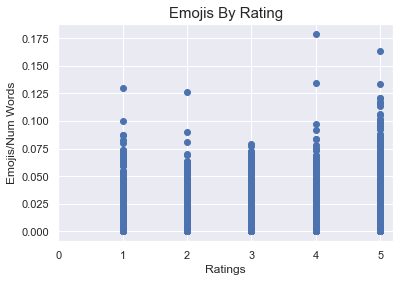

In [91]:
# Plot emojis as proportion of words against rating value
plt.scatter(reviews.Rating,reviews.prop_sc)
plt.title("Emojis By Rating", fontsize = 15)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,6,1))
ax = plt.ylabel("Emojis/Num Words")

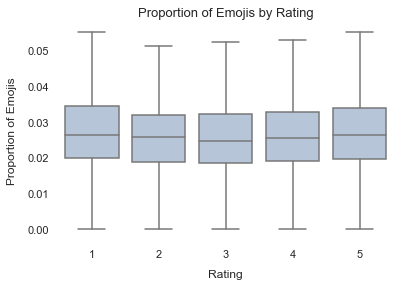

In [92]:
box(reviews["Rating"], reviews["prop_sc"],"Proportion of Emojis by Rating", "Proportion of Emojis")

In [93]:
stats_func(reviews["Emoji_prop"][1:5000],reviews["Rating"])

Shapiro Normality Test: ShapiroResult(statistic=0.08671212196350098, pvalue=0.0)
Levene Variance Test: LeveneResult(statistic=1.4115948146340127, pvalue=0.22733192885896855)
F-Test ANOVA: F_onewayResult(statistic=1.411594814634013, pvalue=0.22733192885896855)


No statistically significant relationship between the number of emojis used by a reviewer as a proportion of all the words in the review and the rating that is given. 

* Most emojis are positive most likely due to the skew towards positive ratings in the data
* There is no statistically significant relationship between the number of emojis used and the rating given
* The presence of emojis was also examined but removed from notebook as there was no statistically significant relationship between the use of emojis or otherwise observed.

In [94]:
reviews.to_csv("Text_attributes.csv")

# Section 7: Heatmap

In [95]:
reviews.columns

Index(['Category', 'Name', 'Title', 'Review', 'Rating', 'Town', 'all_text',
       'num_words', 'num_chars', 'av_word_len', 'uppercase', 'prop_uc',
       'special_chars', 'prop_sc', 'Emoji', 'Emoji_count', 'Emoji_prop'],
      dtype='object')

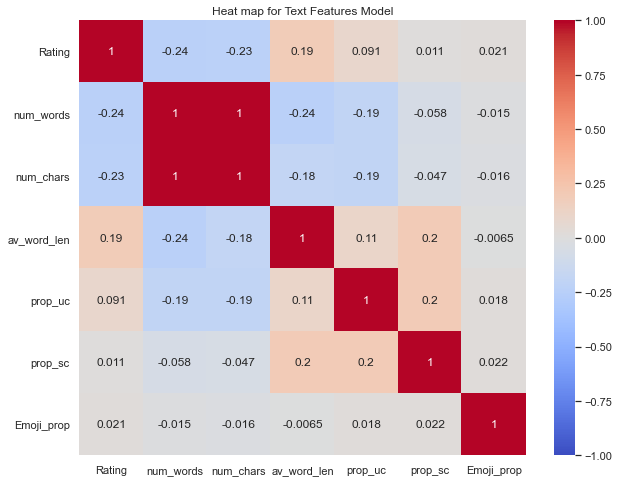

In [96]:
# Heatmap to show relationships
correlation_df = reviews.drop(columns = ["Category","Name","Title","Review","Town","all_text",
                                         "uppercase","special_chars","Emoji","Emoji_count"],axis= 1)
cor_mat = correlation_df.corr()
top_corr_features = cor_mat.index
plt.figure(figsize=(10,8))
plt.title("Heat map for Text Features Model")
#plot heat map
g=sns.heatmap(correlation_df[top_corr_features].corr(),annot=True,vmin=-1, cmap='coolwarm')

* The heatmap shows a positive correlation between rating and the average word length and a negative relationship with the number of words and therefore number of characters used in the review - positive reviews use longer words and negative reviews have more words on average
* The number of characters and the number of words are collinear, so one not both should be included in any model. 
* The rest of the features have very weak positive relationships with ratings. 
* Of interest is the correlation between the proportion of special characters used and the proportion of upper-case characters, suggesting capitalization and punctuation such as perhaps exclamation marks often occur together and they are both correlated with the average word length.

# Section 8: Extract Positive and Negative Review Titles and Text

In [97]:
# Get the shape of the combined reviews dataframe
reviews.shape

(10325, 17)

In [98]:
# Save out file
#reviews.to_csv("Reviews.csv")

In [99]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 1.0]["Title"].sample(5)

1791                 yuck! avoid new pool it’s disgusting
3925                                        Head of House
9041    If you want lousy service and greasy food visi...
3796                                         Dirty knives
925                               Centerparcs this is NOT
Name: Title, dtype: object

In [100]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 2.0]["Title"].sample(5)

908                                            Noisy site
1694    Half Term Break Site Complex not big enough fo...
2269                     Hotel tarnishes the Hilton brand
847                                             Mediocre 
6051                                         Disappointed
Name: Title, dtype: object

In [101]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 3.0]["Title"].sample(5)

8670    Nice food let down hugely by the staff on the ...
8849                          Nice food very slow service
2592                    Not so many real ales this time .
3280                                      Take away order
5081                                          Complacent.
Name: Title, dtype: object

In [102]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 4.0]["Title"].sample(5)

4866                                        Good
6350                                Sunday lunch
425     Well situated for travelling in the area
6304             Great food and good atmosphere.
12                         Just Lunch and a beer
Name: Title, dtype: object

In [103]:
# Sample of lowest ranking reviews to compare to text and title of review
reviews[reviews["Rating"]== 5.0]["Title"].sample(5)

2863     Nice winter meal
3659       Wonderful food
5324    Dinner and drinks
8449    Superb Restaurant
4741             Fabulous
Name: Title, dtype: object

In [104]:
# Split into positive and negative based on ratings
reviews['Score'] = reviews['Rating'].apply(lambda x: "0" if x > 2 else "1")

In [105]:
reviews.shape

(10325, 18)

In [106]:
# Filter to only those rows with Rating not equal to 3 into a new dataframe
reviews_filtered = reviews[reviews["Rating"] != 3]
reviews_filtered.shape

(9455, 18)

In [107]:
# Save to CSV
#reviews2.to_csv("Scored_Reviews.csv",index = False)

In [108]:
# Check positive versus non-positive rating scores 
reviews_filtered.Score.value_counts()

0    8154
1    1301
Name: Score, dtype: int64

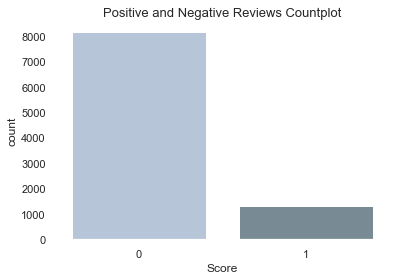

In [109]:
# Coutnplot of the positive and negative scores for all reviews - negative reviews are the minority class since they are the
# class we are interested in
figure, ax = plt.subplots()
ax = sns.countplot("Score",data = reviews_filtered, palette = ["lightsteelblue","xkcd:bluish grey"])
ax.set_facecolor("White")
ax.set_title("Positive and Negative Reviews Countplot", fontsize = 13)
plt.show()

In [110]:
# Average number of words by score
reviews_filtered.groupby("Score")["num_words"].mean()

Score
0     79.268825
1    136.797079
Name: num_words, dtype: float64

In [111]:
# Drop unnecessary column
reviews_filtered = reviews_filtered.drop(columns = ["num_words"], axis = 1)

In [112]:
# Join the Title and Text together into a single column called 'all_text'
# combine title and text together
reviews_filtered['all_text'] = reviews_filtered['Title'] + ' ' + reviews_filtered['Review']
reviews_filtered.head(1)

,Category,Name,Title,Review,Rating,Town,all_text,num_chars,av_word_len,uppercase,prop_uc,special_chars,prop_sc,Emoji,Emoji_count,Emoji_prop,Score
0,Accommodation,Norfolk Arms,Great value in the heart of arundel,Booked a room to stay the night in Arundel. Th...,4,Arundel,Great value in the heart of arundel Booked a r...,202,4.208333,7,0.034653,3,0.014851,0,0,0.0,0


In [113]:
# Examine original text of review and title - as some reviews only have titles and the titles contain information
print(reviews_filtered["all_text"][4])

Clean and Friendly  Stayed for one night, in room 14 which was clean and cosy.
Lots of free parking, the only downside was patchy wi fi and no phone signal in the room.
The buffet breakfast was very good and the staff nice and friendly.
Read less


In [114]:
# Get the text of reviews within each category
text_hotels = reviews_filtered[reviews_filtered["Category"] == "Accommodation"] 
text_rests= reviews_filtered[reviews_filtered["Category"] == "Food"] 
text_attract = reviews_filtered[reviews_filtered["Category"] == "Attractions"] 

In [115]:
text_hotels.head(2)

,Category,Name,Title,Review,Rating,Town,all_text,num_chars,av_word_len,uppercase,prop_uc,special_chars,prop_sc,Emoji,Emoji_count,Emoji_prop,Score
0,Accommodation,Norfolk Arms,Great value in the heart of arundel,Booked a room to stay the night in Arundel. Th...,4,Arundel,Great value in the heart of arundel Booked a r...,202,4.208333,7,0.034653,3,0.014851,0,0,0.0,0
1,Accommodation,Town House,"Excellent food,service and ambience!",We’ve eaten here with a group of friends who g...,5,Arundel,"Excellent food,service and ambience! We’ve eat...",781,4.621302,12,0.015365,22,0.028169,0,0,0.0,0


In [116]:
# Find number of words in the total of all reviews by category
text_h = " ".join(review for review in text_hotels.all_text)
print ("There are {} words in the combination of all hotel reviews.".format(len(text_h)))
text_r = " ".join(review for review in text_rests.all_text)
print ("There are {} words in the combination of all restaurant reviews.".format(len(text_r)))
text_a = " ".join(review for review in text_attract.all_text)
print ("There are {} words in the combination of all attraction reviews.".format(len(text_a)))
text_all = " ".join(review for review in reviews_filtered.all_text)
print ("There are {} words in the combination of all reviews.".format(len(text_all)))

There are 1525883 words in the combination of all hotel reviews.
There are 2520818 words in the combination of all restaurant reviews.
There are 484264 words in the combination of all attraction reviews.
There are 4530967 words in the combination of all reviews.


# Section 9: Positive and Negative Word Clouds

In [117]:
# Get positive and negative reviews for each category and put into separate dataframes
hotels_positive = text_hotels[text_hotels["Score"] == "0"]
rests_positive = text_rests[text_rests["Score"] == "0"]
attract_positive = text_attract[text_attract["Score"] == "0"]

# Extract negative review titles for each category of establishment
hotels_negative = text_hotels[text_hotels["Score"] == "1"]
rests_negative = text_rests[text_rests["Score"] == "1"]
attract_negative = text_attract[text_attract["Score"] == "1"]

In [118]:
# Join all positive reviews together
all_text_h_positive = " ".join(review for review in hotels_positive.all_text)
all_text_r_positive = " ".join(review for review in rests_positive.all_text)
all_text_a_positive = " ".join(review for review in attract_positive.all_text)

# Join all negative reviews together
all_text_h_negative = " ".join(review for review in hotels_negative.all_text)
all_text_r_negative = " ".join(review for review in rests_negative.all_text)
all_text_a_negative = " ".join(review for review in attract_negative.all_text)

In [119]:
# Amend stopwords to remove words scraped from online review in error
stopwords = list(STOPWORDS)
stopwords.append("read")
stopwords.append("less")
stopwords.append("more")
stopwords = set(stopwords)

In [120]:
# Function to generate wordcloud
def gen_wordcloud(df):
    wc = WordCloud(stopwords=stopwords, background_color="white").generate(df)
    return wc

In [121]:
# Generate wordclouds
wordcloud_h_positive = gen_wordcloud(all_text_h_positive)
wordcloud_r_positive = gen_wordcloud(all_text_r_positive)
wordcloud_a_positive = gen_wordcloud(all_text_a_positive)
wordcloud_h_negative = gen_wordcloud(all_text_h_negative)
wordcloud_r_negative = gen_wordcloud(all_text_r_negative)
wordcloud_a_negative = gen_wordcloud(all_text_a_negative)

## Accommodation

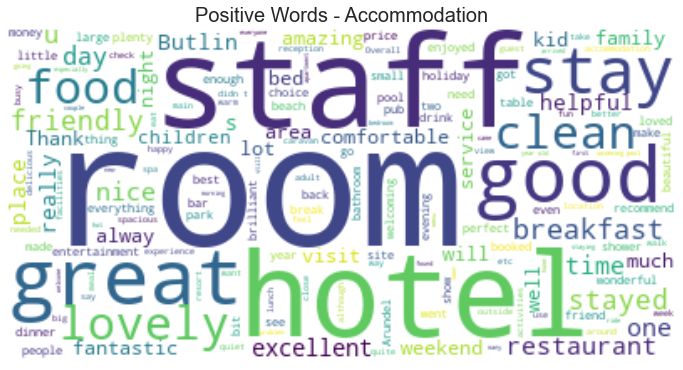

In [122]:
# Display the generated image: Hotels positive words
plt.figure(figsize=[12,10])
plt.title("Positive Words - Accommodation", fontsize = 20)
plt.imshow(wordcloud_h_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

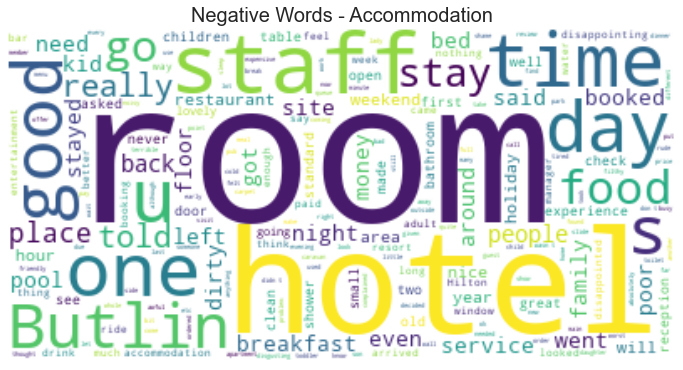

In [123]:
# Display the generated image: Hotels Negative words
plt.figure(figsize=[12,10])
plt.title("Negative Words - Accommodation", fontsize = 20)
plt.imshow(wordcloud_h_negative,interpolation='bilinear')
plt.axis("off")
plt.show()

## Food

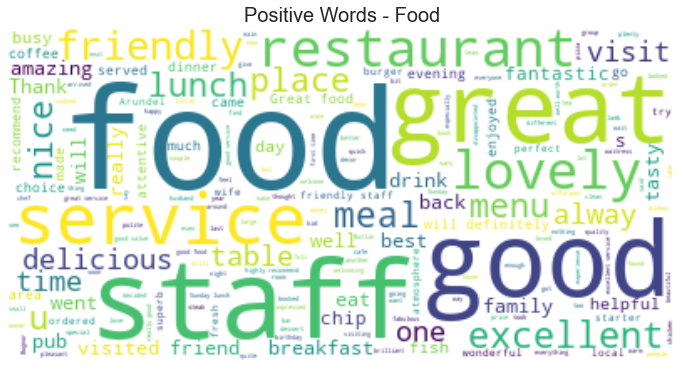

In [124]:
# Display the generated image: Food positive reviews
plt.figure(figsize=[12,10])
plt.title("Positive Words - Food", fontsize = 20)
plt.imshow(wordcloud_r_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

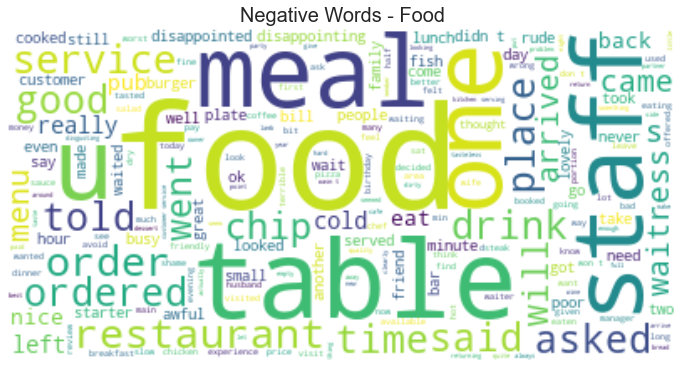

In [125]:
# Display the generated image: Food negative reviews
plt.figure(figsize=[12,10])
plt.title("Negative Words - Food", fontsize = 20)
plt.imshow(wordcloud_r_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

## Attractions 

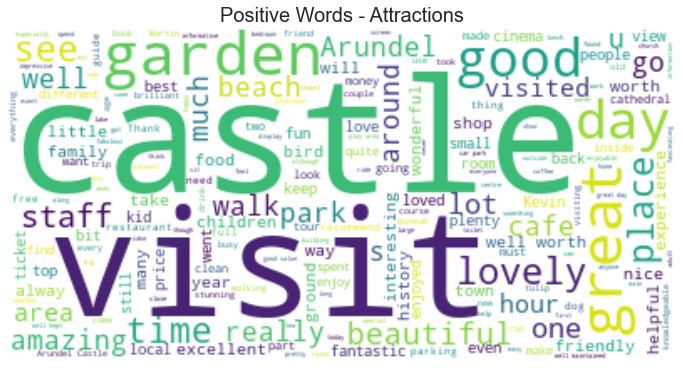

In [126]:
# Display the generated image: Positive attraction reviews
plt.figure(figsize=[12,10])
plt.title("Positive Words - Attractions", fontsize = 20)
plt.imshow(wordcloud_a_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

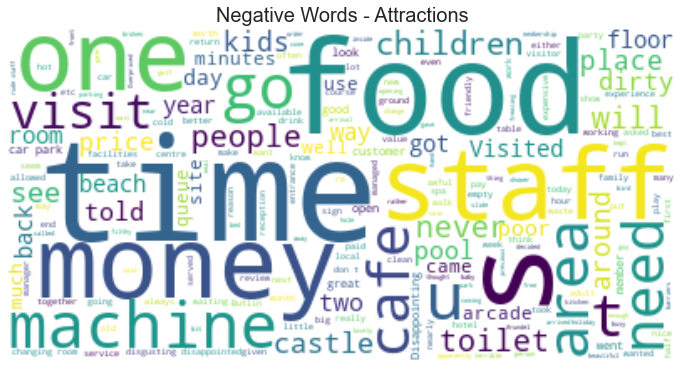

In [127]:
# Display the generated image: Negative attraction reviews
plt.figure(figsize=[12,10])
plt.title("Negative Words - Attractions", fontsize = 20)
plt.imshow(wordcloud_a_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

# Section 10: Word Frequencies

## Accommodation

In [128]:
# Top positive words for hotel reviews
all_text_h_positive = all_text_h_positive.lower()
words_h_positive = [word for word in all_text_h_positive.split() if word not in stopwords]
word_count_h_positive = collections.Counter(words_h_positive)
top_h_positive = word_count_h_positive.most_common()
top_five_h_positive = top_h_positive[0:6]

for tup in top_five_h_positive:
    if tup[0] == "-":
        top_five_h_positive.remove(tup)

print(top_five_h_positive)

[('room', 1164), ('staff', 1125), ('good', 1116), ('great', 1099), ('hotel', 944), ('stay', 847)]


In [129]:
# Top negative words for hotel reviews
all_text_h_negative = all_text_h_negative.lower()
words_h_negative = [word for word in all_text_h_negative.split() if word not in stopwords]
word_count_h_negative = collections.Counter(words_h_negative)
top_h_negative = word_count_h_negative.most_common()
top_five_h_negative = top_h_negative[0:6]

for tup in top_five_h_negative:
    if tup[0] == "-":
        top_five_h_negative.remove(tup)

print(top_five_h_negative)

[('room', 321), ('staff', 199), ('one', 149), ('hotel', 147), ('us', 146)]


## Food

In [130]:
# Top positive words for food reviews
all_text_r_positive = all_text_r_positive.lower()
words_r_positive = [word for word in all_text_r_positive.split() if word not in stopwords]
word_count_r_positive = collections.Counter(words_r_positive)
top_r_positive = word_count_r_positive.most_common()
top_five_r_positive = top_r_positive[0:6]

for tup in top_five_r_positive:
    if tup[0] == "-":
        top_five_r_positive.remove(tup)

print(top_five_r_positive)

[('food', 3826), ('great', 2835), ('good', 2632), ('staff', 1958), ('lovely', 1879), ('service', 1831)]


In [131]:
# Top negative words for food reviews
all_text_r_negative = all_text_r_negative.lower()
words_r_negative = [word for word in all_text_r_negative.split() if word not in stopwords]
word_count_r_negative = collections.Counter(words_r_negative)
top_r_negative = word_count_r_negative.most_common()
top_five_r_negative = top_r_negative[0:6]

for tup in top_five_r_negative:
    if tup[0] == "-":
        top_five_r_negative.remove(tup)

print(top_five_r_negative)

[('food', 756), ('staff', 360), ('us', 321), ('one', 317), ('service', 311), ('table', 290)]


## Attractions

In [132]:
# Top positive words for attraction reviews
all_text_a_positive = all_text_a_positive.lower()
words_a_positive = [word for word in all_text_a_positive.split() if word not in stopwords]
word_count_a_positive = collections.Counter(words_a_positive)
top_a_positive = word_count_a_positive.most_common()
top_five_a_positive = top_a_positive[0:6]

for tup in top_five_a_positive:
    if tup[0] == "-":
        top_five_a_positive.remove(tup)

print(top_five_a_positive)

[('great', 472), ('castle', 430), ('well', 367), ('good', 335), ('lovely', 315), ('day', 310)]


In [133]:
# Top negative words for attraction reviews
all_text_a_negative = all_text_a_negative.lower()
words_a_negative = [word for word in all_text_a_negative.split() if word not in stopwords]
word_count_a_negative = collections.Counter(words_a_negative)
top_a_negative = word_count_a_negative.most_common()
top_five_a_negative = top_a_negative[0:11]

for tup in top_five_a_negative:
    if tup[0] == "-":
        top_five_a_negative.remove(tup)

print(top_five_a_negative)

[('staff', 28), ('one', 22), ('food', 22), ('go', 19), ('time', 18), ('money', 18), ('us', 17), ('will', 16), ('never', 16), ('car', 16), ('machines', 15)]
